주의) RhinoMorph와 KoNLPy는 동시에 import할 수 없다.

In [1]:
import numpy as np
import pandas as pd

In [2]:
test=pd.read_csv("C:\\Users\\SAMSUNG\\Downloads\\drive-download-20210114T065344Z-001\\samsung_005930_42.csv",encoding='utf-8-sig')

In [3]:
test['date']=test['date'].str.replace(pat=r'[^\w]',repl=r'',regex=True)

In [4]:
test['date']=pd.to_datetime(test['date'],format='%Y%m%d%H%M%S')

In [5]:
test.drop(labels='Unnamed: 0',axis=1,inplace=True)

In [6]:
test['title']=test['title'].str.replace(pat="']",repl='',regex=False)

In [7]:
test['title']=test['title'].str.replace(pat="['",repl='',regex=False)

In [8]:
test

,title,date
0,"외인, 기관 저가에 매집하는중 [3]",2020-07-03 09:05:02
1,ㅋㅋㅋㅋㅋㅋㅋㅋㅋ,2020-07-03 09:05:00
2,상보)미 코로나 5만명넘어 봉쇄잇달아,2020-07-03 09:04:09
3,삼전 모으기 2차동학운동이 진행되어야한다,2020-07-03 09:04:05
4,미친 주식시장 [3],2020-07-03 09:04:05
...,...,...
4015,집권여당이 부동산대책을 21 번씩 ...,2020-06-28 08:01:09
4016,오후 막판 KOSPI -150 POINT...,2020-06-28 08:01:07
4017,이런 최악질 댓글 쓰레기가 더불어 홍어 ...,2020-06-28 08:01:04
4018,토착왜구들 [3],2020-06-28 08:01:01


In [17]:
from konlpy.tag import Okt
okt=Okt()

In [16]:
print(test['title'][0])

외인, 기관 저가에 매집하는중 [3]


In [11]:
print(okt.morphs(test['title'][0]))

['외인', ',', '기관', '저가', '에', '매집', '하는', '중', '[', '3', ']']


In [12]:
print(okt.pos(test['title'][0]))

[('외인', 'Noun'), (',', 'Punctuation'), ('기관', 'Noun'), ('저가', 'Noun'), ('에', 'Josa'), ('매집', 'Noun'), ('하는', 'Verb'), ('중', 'Noun'), ('[', 'Punctuation'), ('3', 'Number'), (']', 'Punctuation')]


In [15]:
print(okt.pos(test['title'][0],norm=True,stem=True))

[('외인', 'Noun'), (',', 'Punctuation'), ('기관', 'Noun'), ('저가', 'Noun'), ('에', 'Josa'), ('매집', 'Noun'), ('하다', 'Verb'), ('중', 'Noun'), ('[', 'Punctuation'), ('3', 'Number'), (']', 'Punctuation')]


okt 장점 : 빠른편   
단점 : 정확도가 떨어지는 것 같음. 분리가 필요할때는 붙이고, 합친게 필요할때는 분리하는것 같음

In [8]:
from konlpy.tag import Kkma  
kkma=Kkma()

In [18]:
print(test['title'][0])

외인, 기관 저가에 매집하는중 [3]


In [19]:
print(kkma.pos(test['title'][0]))

[('외인', 'NNG'), (',', 'SP'), ('기관', 'NNG'), ('저가', 'NNG'), ('에', 'JKM'), ('매집', 'NNG'), ('하', 'XSV'), ('는', 'ETD'), ('중', 'NNB'), ('[', 'SS'), ('3', 'NR'), (']', 'SS')]


In [22]:
print(kkma.pos(test['title'][0]))

[('외인', 'NNG'), (',', 'SP'), ('기관', 'NNG'), ('저가', 'NNG'), ('에', 'JKM'), ('매집', 'NNG'), ('하', 'XSV'), ('는', 'ETD'), ('중', 'NNB'), ('[', 'SS'), ('3', 'NR'), (']', 'SS')]


장점 : 구분시에 정확도는 꽤 높아보임.    
단점 : 너무 오래걸림
    

In [24]:
from konlpy.tag import Hannanum
hannanum=Hannanum()

In [25]:
print(hannanum.pos(test['title'][0]))

[('외', 'N'), ('이', 'J'), ('ㄴ', 'E'), (',', 'S'), ('기관', 'N'), ('저가', 'N'), ('에', 'J'), ('매집하는중', 'N'), ('[', 'S'), ('3', 'N'), (']', 'S')]


장점 : 분리는 꽤 잘함       
단점 : 오래걸림. 분리를 너무 많이 함

In [8]:
from konlpy.tag import Komoran
komoran=Komoran()

In [28]:
print(komoran.pos(test['title'][0]))

[('외인', 'NNG'), (',', 'SP'), ('기관', 'NNG'), ('저가', 'NNG'), ('에', 'JKB'), ('매', 'NNG'), ('집', 'NNG'), ('하', 'XSV'), ('는', 'ETM'), ('중', 'NNP'), ('[', 'SS'), ('3', 'SN'), (']', 'SS')]


뚜렷한 장점은 없어보이고.. 정확도도 그렇게 높지 않음

Mecab은 윈도우에서 지원하지 않는다.

In [8]:
import rhinoMorph

rn = rhinoMorph.startRhino()

filepath:  C:\Users\SAMSUNG\anaconda3\Lib\site-packages
classpath:  C:\Users\SAMSUNG\anaconda3\Lib\site-packages\rhinoMorph/lib/rhino.jar
RHINO started!


In [10]:
text='외인, 기관 저가에 매집하는중 [3]'

In [12]:
print(rhinoMorph.onlyMorph_list(rn,text))

['외인', ',', '기관', '저가', '에', '매집', '하', '는', '중', '[', '3', ']']


In [13]:
print(rhinoMorph.wholeResult_text(rn,text))

외인	외인/NNG
,	,/SP
기관	기관/NNG
저가에	저가/NNG + 에/JKB
매집하는중	매집/XR + 하/XSV + 는/ETM + 중/NNB
[	[/SS
3	3/SN
]	]/SS



장점 : 정확도도 높고 매우 빠르다.   
단점: 말그대로 형태소만 분석하다보니 띄어쓰기 같은 문장분석기능이 없다...

In [17]:
print("원래 문장 : ",test['title'][2])
print(rhinoMorph.wholeResult_text(rn,test['title'][2]))

원래 문장 :  상보)미 코로나 5만명넘어 봉쇄잇달아
상보	상보/NNG
)	)/SS
미	미/NNG
코로나	코로나/NNP
5만명넘어	5/SH + 만/NR + 명/NNG + 넘/VV + 어/EC
봉쇄잇달아	봉쇄/NNG + 잇달/VV + 아/EC



KoNLPY같은 경우 맞춤법을 고쳐주는 기능이 있음.   
rhinoMorph는 그런 기능이 없어서 적절하게 두가지를 섞어야 한다.   
물론 위에서 언급했듯이 두 기능은 동시에 import가 불가능하다. (아마도 JPype를 써야해서 그런거같다.)

In [12]:
import re

In [10]:
morphed_data=''

for i in test['title']:
    morphed_data_object=rhinoMorph.onlyMorph_list(rn,i,pos=['NNG','NNP','NR','VV','VA','VX','VCP','VCN','MM','MAG','IC','SO','SL','SH','SW'])
    joined_data_object=' '.join(morphed_data_object)
    
    if joined_data_object:
        morphed_data+=joined_data_object+'\n'

In [20]:
print(morphed_data)

외인 기관 저가
ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋ
상보 미 코로나 5 만 명 넘 봉쇄 잇달
삼전 모으 되 하
미치 주식시장
깊
이 잡 주
이명박 근혜 몇 전 이 같
인도 중 시위 있
ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋ
오늘 하
주식 이 ~ ~
이명박 박근혜 때가 그립
아
이 잡 주
배 메모리 칩 발견 정도
매수세 매도 세 보 때 오늘 상승 없
개소리
파도 심하
선물 매도 치 이제 수익
선물 매도 치 이제 수익
그러
삼전 찍히 눈 밖 나 종목 이
한 틱 올리 다른 주식 더
마이크 로프 랜드
개소리 ~
ㅋㅋ 충격 미 대학생 코로나 먼저 걸리
외인 사 말 팔 고 꺼지
매수 매도 하 넘 상 또라이
동학 개미 조 들 증시 몰리
~ ~
빨간불 줄 때 털 절대 못 오르
삼전
바이오 인기 떨어지 때 참
좌 차 티 장시 작전 폭등 거품 물때
삼전 1 억만 들 싶
팔 일찍 감치 ~ 상하
추 매 완료
왜 삼전 지수 더 빠지
문재 알바 좌 차 티 덕 오늘
추 매 완료
왜 삼전 지수 더 빠지
문재 알바 좌 차 티 덕 오늘
이야
삼성전자
여기 차 티 신 패턴 미장 오르 시초
기관 외국인 둘 다 ^^
목표 가 올려놓
삼성 진짜 알 가 안 가
아침 설레발 치 좌 차 새기 꼴 좋
또
속보 미국 연준 조 양적 완화
오늘 외면 ~ ~
역시 개관 새리 다 파
ㅋㅋ ㅋㅋ 개미
만 천 만 주 물
오후
가 말
양도세 국민 청원 주
양도세 국민 청원 주
오늘 좀 찍자
삼성전자
되 게시물 답글 되 게시물
분기 실적 증가 ※ ~ ~
아니 배 메모리 칩 주가 영향
● 속보 ●
삼청교육대
그사이 호재 터지 위안 얻
올라서 고맙 길 하 미장 보합 개미 만 사
종가 + 예상
피자헛 파산
되 게시물 답글 석열 때려 잡
오늘 푸 하락 이
삼전 모으 되 하
배 메모리 대박
정치인
전자 칠판 OLED 고선명 TV 겸용
SK 바이오 팔 또 상 하
유동성 나스닥 상위 종목 치 올리
나노 반도체 삼성 이루 내
속보 삼전 신기술 발견 - 메모리 용량
삼성전자 소액주주
모지 리 한 알리 주
정치 충 없 지 삼전 게시판 지
가 쥬
문통 노영민
정치 

In [18]:
type(morphed_data)

str

In [11]:
merge_text_list=re.split('\n| ',morphed_data)

In [22]:
type(merge_text_list)

list

In [23]:
print(merge_text_list)

['외인 기관 저가', 'ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋ', '상보 미 코로나 5 만 명 넘 봉쇄 잇달', '삼전 모으 되 하', '미치 주식시장', '깊', '이 잡 주', '이명박 근혜 몇 전 이 같', '인도 중 시위 있', 'ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋ', '오늘 하', '주식 이 ~ ~', '이명박 박근혜 때가 그립', '아', '이 잡 주', '배 메모리 칩 발견 정도', '매수세 매도 세 보 때 오늘 상승 없', '개소리', '파도 심하', '선물 매도 치 이제 수익', '선물 매도 치 이제 수익', '그러', '삼전 찍히 눈 밖 나 종목 이', '한 틱 올리 다른 주식 더', '마이크 로프 랜드', '개소리 ~', 'ㅋㅋ 충격 미 대학생 코로나 먼저 걸리', '외인 사 말 팔 고 꺼지', '매수 매도 하 넘 상 또라이', '동학 개미 조 들 증시 몰리', '~ ~', '빨간불 줄 때 털 절대 못 오르', '삼전', '바이오 인기 떨어지 때 참', '좌 차 티 장시 작전 폭등 거품 물때', '삼전 1 억만 들 싶', '팔 일찍 감치 ~ 상하', '추 매 완료', '왜 삼전 지수 더 빠지', '문재 알바 좌 차 티 덕 오늘', '추 매 완료', '왜 삼전 지수 더 빠지', '문재 알바 좌 차 티 덕 오늘', '이야', '삼성전자', '여기 차 티 신 패턴 미장 오르 시초', '기관 외국인 둘 다 ^^', '목표 가 올려놓', '삼성 진짜 알 가 안 가', '아침 설레발 치 좌 차 새기 꼴 좋', '또', '속보 미국 연준 조 양적 완화', '오늘 외면 ~ ~', '역시 개관 새리 다 파', 'ㅋㅋ ㅋㅋ 개미', '만 천 만 주 물', '오후', '가 말', '양도세 국민 청원 주', '양도세 국민 청원 주', '오늘 좀 찍자', '삼성전자', '되 게시물 답글 되 게시물', '분기 실적 증가 ※ ~ ~', '아니 배 메모리 칩 주가 영향', '● 속보 ●', '삼청교육대', '그사이 호재 터지 위안 얻', '올라서 고맙 길 하 미장 보합 개미 만 사', '종가

In [12]:
word=pd.Series(merge_text_list)

In [15]:
result=word.value_counts().head(20)

In [16]:
result

~       384
이       374
하       347
주       228
삼전      190
오늘      188
되       170
주식      161
보       129
가       127
양도세     127
미국      125
문재인     111
*       108
코로나     104
삼성전자     97
-        95
ㅡ        91
있        91
오르       91
dtype: int64

양도세 단어 개수는 149개로 한참 못 미친다...   
그러나 오늘의 단어 개수는 188개로 정확하게 분류되었다.   
다른 라이브러리를 살펴봐야 한다.

In [13]:
noun_data=''
for i in test['title']:
    noun_data_object=kkma.nouns(i)
    noun_join_object=' '.join(noun_data_object)
    
    if noun_data_object:
        noun_data+=noun_join_object+'\n'

In [14]:
print(noun_data)

외인 기관 저가 매집 중 3
상보 미 코로나 5 5만명 만 명 봉쇄
삼전 2 2차동학운동 차 동학 운동 진행
주식 주식시장 시장 3
듯 1
주
이명박근혜때 년 년전 전 거
인도 반 반중시위 중 시위
오늘 53 53층 층 거
이것 주식
이명 이명박 박 박근혜때 1
100 100원올랏 원 올 랏 당
개잡주
1000 1000배 배 메모리 칩 발견 정도
매수세 매도 매도세 세 때 오늘 상승 1
개소리
파도
53000 53000원 원 선물 선물매도 매도 이제 수익
53000 53000원 원 선물 선물매도 매도 이제 수익
삼전 눈 종목
틱 주식 3 3프로 프로 거
프로텍 마이크 마이크로프랜드 로프 랜드
개소리
충격 미 대학생 코로나 걸리
외인 사지 사지마라 마라 라
8113 매 매수 수 매도 넘 상 또라이
동학 개미 50 50조 조 증시
어지
불줄 불줄때 때
삼전
바이오 인기 때 3
좌 찬 찬티 티 장시 장시작전 작전 폭등 폭등거품물때 거품 물때
삼전 1 1억 억
감치 1
완료
삼전 지수 4
문 문재앙 재앙 알바 좌 찬 찬티 티 덕 오늘 개꼬
완료
삼전 지수 4
문 문재앙 재앙 알바 좌 찬 찬티 티 덕 오늘 개꼬
삼성 삼성전자 전자
여기 찬 찬티 티 벙신들 패턴 미장 시초
기관 외국인 둘
목 목표가 표가
삼성 진짜 안 1
아침 설레발 좌 찬 찬티 티 꼴 1
100 100원 원
속보 미국 연 10 10조 조 달러 양적 양적완화 완화
오늘 외면
7 7월 월
역시나 개관 개관새리 새 리
개미
5 5만8천 만 8 천 100 100원 원 2 2만주 만주 물렷는데 4
오후 525000 듯 1
자네 말
양도 국민 국민청원 청원 동참
양도 국민 국민청원 청원 동참
오늘 54000 54000원 원
삼성 삼성전자 전자
삭제 게시물 답 답글 글 게시 게시물의 물의
2 2분기 분기 실적 증가
1000 1000배 배 메모리 칩 주가 영향
속보
삼청 삼청교육대 교육대
사이 호재 이거 위안
미장 보합 개미 사
종가 예상
피 피자헛 자헛 파산 1
3 3년전액면 년 전 액면 분할 분할가격 가격
삭제 

In [33]:
noun_list=re.split('\n| ',noun_data)
kkm_word=pd.Series(noun_list)

In [35]:
kkm_result=kkm_word.value_counts().head(20)
kkm_result

1       821
2       408
3       222
주식      210
문       188
양도      186
삼전      185
오늘      183
삼성      159
개       119
미국      117
전자      109
재인      109
글       100
원        99
코로나      97
삼성전자     96
중        92
문재인      92
주        89
dtype: int64

꼬꼬마도 제대로 된 분류가 안되는 것 같다..

In [21]:
okt_data=''
for i in test['title']:
    okt_data_object=okt.nouns(i)
    okt_join_object=' '.join(okt_data_object)
    
    if okt_data_object:
        okt_data+=okt_join_object+'\n'

In [22]:
print(okt_data)

외인 기관 저가 매집 중
상보 코로나 봉쇄 달
삼전 차 동학운동 진행
주식시장
듯
이
이명 박근혜 때 년전
인도 반중 시위
오늘 층
걸 주식
이명박 박근혜 때
이 개
배 메모리 칩 발견 정도
도세 볼때 오늘 상승
개 소리
파도
선물 매도 이제 수익
선물 매도 이제 수익
삼전 눈 난 종목
틱 주식 프로 더
프로 텍 마이크 로프 랜드
개 소리
충격 대학생 코로나 먼저
외인 팔고
매수 매도 상 또 라이
동학 개미 증시
때 절 대못
삼전
바이오 인기 때
좌빨 찬티 장시 작전 폭등 거품 물때
삼전
일찍 감치 상한
완료
왜 삼전 지수 더
재앙 알바 좌빨 찬티 덕 오늘 개꼬
완료
왜 삼전 지수 더
재앙 알바 좌빨 찬티 덕 오늘 개꼬
삼성 전자
여기 찬티 벙신들 패턴 미장 시초
기관 외국
목표
삼성 진짜 안 간다 안
아침 발치 던 좌빨 찬티 꼴
또
속보 미국 준 달러 양적완화
오늘 외면
역시 개관 리
개미
물렷는데
오후
자네 갈껀 말껀
도세 국민 청원 동참
도세 국민 청원 동참
오늘 좀
삼성 전자
삭제 게시 물의 답글 삭제 게시 물의
실적 증가
배 메모리 칩 주가 영향
속보
삼청교육대
사이 호재 거 보고 위안
미장 보합 개미 사
종가 예상
피자헛 파산
삭제 게시 물의 답글 열
오늘 하락
삼전 차 동학운동 진행
배 메모리 대박
정치
전자칠판 고선명 겸용
바이오 또 상한
유동성 나스닥 상위 종목
나노 반도체 삼성
속보 삼전 기술 발견 메모리 용량
삼성 전자 투자 소액 주주 중
지리 한가지
정치 충 게시판
가쥬
통 노영민 말
정치 얘기
팀닥터 쓰레기 인간
개장 전 뉴스
똘추 깨문
철인 종 폭력 스캔들 헬조
정치 충 게시판
권력 수사 방해 검찰 개혁
어차피
부동산 어제 오늘 일 이번
나 오늘 정치 충 똥글 신고 누
검은금욜 개떡 락준 비 개꼬 시기
삭제 게시 물의 답글 삭제 게시 물의
경실련 김현미 박근혜 때문 집값 오
몇 로 상승
욕심
토방 갱 놈 질
바이오
지금 중국본토 드라마
미장 척 종가 코스피 종가 때
경상도 전라도
법 바로 윤석렬 친 문재인
문재인 고갱 놈 토방 연
상한

In [39]:
okt_list=re.split('\n| ',okt_data)
okt_word=pd.Series(okt_list)
okt_result=okt_word.value_counts().head(20)
okt_result

오늘     185
주식     175
삼전     169
삼성     139
도세     126
미국     122
문재인    113
코로나    104
전자     100
폭락      94
개       93
삭제      83
게시      83
개미      82
물의      82
답글      79
선물      66
청원      65
대통령     64
부동산     62
dtype: int64

왜이럴까

In [25]:
han_data=''
for i in test['title']:
    han_data_object=hannanum.nouns(i)
    han_join_object=' '.join(han_data_object)
    
    if han_data_object:
        han_data+=han_join_object+'\n'

In [26]:
print(han_data)

외 기관 저가 매집하는중 3
ㅋㅋㅋㅋㅋ ㅋㅋㅋㅋ
상보 미 코 5만명넘어 봉쇄잇달
삼전 2차동학운동 진행
주식시장 3
듯 1
잡주
이명박근혜때 몇년전인거같은데
인도 반중시위하
ㅋㅋㅋㅋㅋ ㅋㅋㅋㅋ
오늘 53층 할거면
이걸 주식
이명박 박근혜때 1
아싸100원올랏당
개잡주
1000배 메모리 칩 발견 이정
수세 매도세 때 오늘 상승 1
개소리
파도
53000원 선물매도쳤다 수익
53000원 선물매도쳤다 수익
삼전 눈 종목
한틱올리는게 다른주식 3프로가는거보다 더.
프로텍, 마이크로프랜드
개소리
ㅋㅋ 충격 미 대학생들 코 것 리
외 사지마 팔고꺼져
8113 매수 상 또라이
동학 개미 50조 증시
어지간해
빨간불줄때 절대못오른다
삼전
바 인기 때 3
좌빨 찬티들 장시작전부터 폭등거품물때
삼전 1억만들고싶으
일찍감치~ 1
추매완료
삼전 지수 4
문재앙 바 좌빨 찬티들덕 오늘 개꼬
추매완료
삼전 지수 4
문재앙 바 좌빨 찬티들덕 오늘 개꼬
이
삼성전자
찬티 벙신들 패턴 미장오르 시초
기관 외국 둘다
목표
삼성 진짜 안간다 안 1
아침 설레발치 좌빨찬티새기들 꼴좋다 1
100원
(속보)미국 연준 10조 양적완화
오늘 외면
7월
개관새리들
ㅋㅋㅋㅋ멍청한 개미들
5만8천100원 2만주 물렷는데요 4
오후 525000찍으러갈듯 1
자네 갈껀 말껀
양도세 국민청원 동참
양도세 국민청원 동참
오늘 54000원
삼성전자
삭제 게시물 답글][삭제된 게시물
2분기 실적 증 ※
1000배 메모리 칩 주가 영향
● 속보 ●
삼청교육대
호재 이거 위안 얻.
고맙긴한데 미장 보합 개미
종 +예상
피자헛 파산 1
3년전액면분할가격
삭제 게시물 답글]석열
오늘 3퍼 하락
삼전 2차동학운동 진행 1
1000배 메모리 대박
정치인들 1
전자칠판 고선명 겸용
Sk바이오팜, 1
유동성 나스닥 상위종목 쳐올렸으
나노반도체 삼성 내
속보 삼전 신기술 발견 메모리용량
삼성전자 투자하 소액주주분
모지리 한가지
정치충 삼전게시판 깨끗해 2
가쥬
통 노영민한테한말 1
정치얘기
팀닥터 쓰레기 인간
07 03 개장전 주요

In [38]:
han_list=re.split('\n| ',han_data)
han_word=pd.Series(han_list)
han_result=han_word.value_counts().head(20)
han_result

1       776
2       339
오늘      169
3       162
삼전      153
주식      112
양도세     110
게시물      82
삭제       78
삼성전자     69
코        69
미국       68
4        64
것        59
문재       51
내        49
부동산      46
나        40
5        40
삼성       40
dtype: int64

음...

In [9]:
kom_data=''
for i in test['title']:
    kom_data_object=komoran.nouns(i)
    kom_join_object=' '.join(kom_data_object)
    
    if kom_data_object:
        kom_data+=kom_join_object+'\n'

In [10]:
print(kom_data)

외인 기관 저가 매 집 중
상보 미 코로나 명 봉쇄
전 차 동학 운동 진행
주식 시장
듯
잡주
이명 박근혜 때 년 전인 거
인도 중시
오늘 할거
주식
이명박 박근혜 때
원
개 잡주
배 메모리 칩 발견 정도
매수세 매도 세 볼 때 오늘 상승
개소리
파도
원 선물 매도 수익
원 선물 매도 수익
전 눈 종목
틱 주식 프로 거
프로텍 마이크 로프 랜드
개 소리
충격 미 대학생 코로나 걸리
외 사지 마라
매수 매도 넘 상 또라이
동학 개미 증시
불 줄 때 절대
전
바이오 인기 때
좌 찬 티 장시 작전 폭등 거품 물 때
전
감
추 매 완료
전 지수
문 재앙 알바 좌 찬 티 덕 오늘
추 매 완료
전 지수
문 재앙 알바 좌 찬 티 덕 오늘
삼성전자
찬 티 패턴 미장 시초
기관 외국인 다
목표
삼성 간다
아침 설 레바 좌 찬 티 새 기 꼴
원
속보 미국 연준 달러 양 완화
오늘 외면
7월
개관 새 리
개미
원 만주
오후
껀 가 말 꺼
도세 국민 청원 동참
도세 국민 청원 동참
오늘 원
삼성전자
삭제 게시물 답 글 삭제 게시물
분기 실적 증가
배 메모리 칩 주가 영향
속보
삼청교육대
사이 호 재가 위안
미 장 보 합 개미
종가 예상
피자헛 파산
3년 전 액면 분할 가격
삭제 게시물 답 글 석 열 때려
오늘 하락
전 차 동학 운동 진행
배 메모리 대박
정치인
전자 칠판 고선명 겸용
바이오 상한가
유동성 나스닥 상위 종목
나노 반도체 삼성
속보 전 신기술 발견 메모리 용량
삼성전자 투자 소액 주주 분 중
지리 한가지
정치 충 전 게시판
쥬
문 통 노영민 한말
정치 얘기
팀 닥터 쓰레기 인간
개장 전 뉴스
시 추 깨 문
철인 종 폭력 스캔들 조
정치 충 전 게시판
부패 권력 수사 방해 검찰 개혁
부동산 오늘 일 이번
오늘 정치 충 똥 글 신고 누
금요 개떡 락 준비 개
삭제 게시물 답 글 삭제 게시물
경실련 김현미 박근혜 때문 집값
상승
욕심
삼 토방 갱 상도 놈 이안
바이오
중국 본토 드라마
미 장 척 종가 코스 피 종가 때
경상도 넘 전라도 넘
법 윤석렬 문재인
문재인 이 고갱 

In [15]:
kom_list=re.split('\n| ',kom_data)
kom_word=pd.Series(kom_list)
kom_result=kom_word.value_counts()
kom_result

주식     213
오늘     185
전      183
미국     123
도세     122
      ... 
전투       1
조치       1
한명숙      1
나기       1
지난해      1
Length: 2981, dtype: int64

morph도 어차피 같은 결과가 나올 것이다.   
왜냐하면 형태소 분리된 것 중에서 명사만 뽑았으므로   
따라서 위의 라이브러리 중 그나마 정확한 라이브러리를 선택해야 한다.

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import matplotlib as mpl
wc=WordCloud(font_path='C://Windows//Fonts/malgun.ttf',background_color='white',width=1000,height=1000,max_words=100,max_font_size=300)

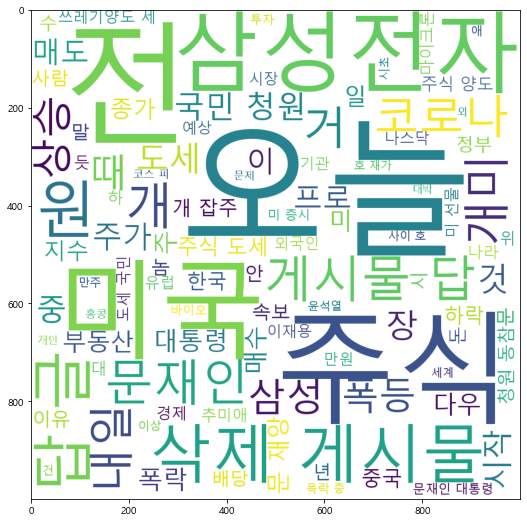

In [38]:
plt.imshow(wc.generate(kom_data))
plt.rcParams['figure.figsize']=(5,3)
plt.show()

코모란으로 그려본 워드클라우드   
쓸데 없는 단어를 제거할 필요가 있다.